In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

In [15]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [16]:
data= pd.read_csv('/content/Corrupted2_20_small.csv')
data

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified
0,0,143.292953,127.939780,False
1,1,80.523981,81.891216,False
2,2,98.703222,168.490227,False
3,3,129.861942,117.817454,False
4,4,80.658517,793.977681,True
...,...,...,...,...
9995,9995,167.404367,111.930927,False
9996,9996,118.069964,1001.176680,True
9997,9997,116.545783,38.279239,False
9998,9998,129.807868,76.094646,False


In [17]:
data = data.drop('Unnamed: 0',axis=1)
data

,Mystery_Data_X,Mystery_Data_Y,Modified
0,143.292953,127.939780,False
1,80.523981,81.891216,False
2,98.703222,168.490227,False
3,129.861942,117.817454,False
4,80.658517,793.977681,True
...,...,...,...
9995,167.404367,111.930927,False
9996,118.069964,1001.176680,True
9997,116.545783,38.279239,False
9998,129.807868,76.094646,False


In [18]:
data = data.fillna(0)

In [19]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]


In [20]:
X

,Mystery_Data_X,Mystery_Data_Y
0,143.292953,127.939780
1,80.523981,81.891216
2,98.703222,168.490227
3,129.861942,117.817454
4,80.658517,793.977681
...,...,...
9995,167.404367,111.930927
9996,118.069964,1001.176680
9997,116.545783,38.279239
9998,129.807868,76.094646


In [21]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [22]:
# fit the model for outlier detection 
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.4)

In [23]:
# use fit_predict to compute the predicted labels of the training samples

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

In [24]:
data['scores']=X_scores
data['anomaly']=y_pred
data.head(20)

,Mystery_Data_X,Mystery_Data_Y,Modified,scores,anomaly
0,143.292953,127.939780,False,-1.029749,-1
1,80.523981,81.891216,False,-1.044628,-1
2,98.703222,168.490227,False,-1.045328,-1
3,129.861942,117.817454,False,-1.003965,1
4,80.658517,793.977681,True,-1.033752,-1
5,120.387921,940.524679,True,-0.991184,1
6,128.735339,127.886463,False,-1.010772,1
7,112.396668,142.160446,False,-1.033085,-1
8,140.698051,119.104152,False,-1.021815,-1
9,103.234252,108.265453,False,-1.018669,-1


In [25]:
outlier_idx = data.index[data.anomaly==-1]

In [26]:
outliers = outlier_idx

In [27]:
arr = data.index.isin(outliers)

In [28]:
arr

array([ True,  True,  True, ...,  True, False, False])

In [29]:
data = pd.DataFrame(arr, columns =['Model'])

In [30]:
data

,Model
0,True
1,True
2,True
3,False
4,True
...,...
9995,False
9996,False
9997,True
9998,False


In [31]:
data.to_csv('check.csv')

In [32]:
import pandas as pd

In [33]:
read = pd.read_csv('/content/Corrupted2_20_small_LOF.csv')
read

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified,Model,CHECKING
0,0,143.292953,127.939780,False,True,False
1,1,80.523981,81.891216,False,True,False
2,2,98.703222,168.490227,False,True,False
3,3,129.861942,117.817454,False,False,True
4,4,80.658517,793.977681,True,True,True
...,...,...,...,...,...,...
9995,9995,167.404367,111.930927,False,False,True
9996,9996,118.069964,1001.176680,True,False,False
9997,9997,116.545783,38.279239,False,True,False
9998,9998,129.807868,76.094646,False,False,True


In [34]:
l = len(read['Modified'])
l

10000

In [35]:
count3 = 0
count4 = 0
for i in range(0,l):
  if(read['Modified'][i] == True and read['Model'][i] == True):
    count3 = count3 + 1
  elif(read['Modified'][i] == False and read['Model'][i] == False):
    count3 = count3 + 1
  else:
    count4 = count4 + 1 
accuracy = count3/l
accuracy  

0.5879

In [36]:
count3 = 0
count4 = 0
for i in range(0,l):
  if(read['Modified'][i] == True):
    count3 = count3 + 1
    if(read['Model'][i] == True):
      count4 = count4 + 1
acc = count4/count3
acc 

0.472636815920398

In [37]:
count6 = 0
count5 = 0
for i in range(0,l):
  if(read['Model'][i] == True):
      count6 = count6 + 1
for i in range(0,l):
  if(read['Modified'][i] == True):
    if(read['Model'][i] == True):
      count5 = count5 + 1 
precision = count5/count6
precision 

0.26125

In [38]:
count7 = 0
count8 = 0
for i in range(0,l):
  if(read['Modified'][i] == False):
    count8 = count8 + 1
    if(read['Model'][i] == False):
      count7 = count7 + 1
sensitivity = count7/count8    
sensitivity 

0.6206188214148157

In [39]:
f1_score = 2*acc*precision/(acc+precision)
f1_score

0.3364997584929963

In [40]:
import numpy as np

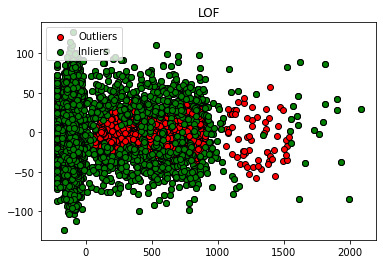

In [45]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("LOF")
plt.scatter(X_pca[:,0], X_pca[:,1], color='r',edgecolors='black',label="Outliers")
plt.scatter(values[:,0],values[:,1], color='green', edgecolors='black',label="Inliers")
plt.legend(loc="upper left")
plt.show()